<a href="https://colab.research.google.com/github/edilsondesouza/dcc_ufmg_masters_edilson/blob/master/DataViz_DCC_UFMG_COVID19_Lucas_Edilson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

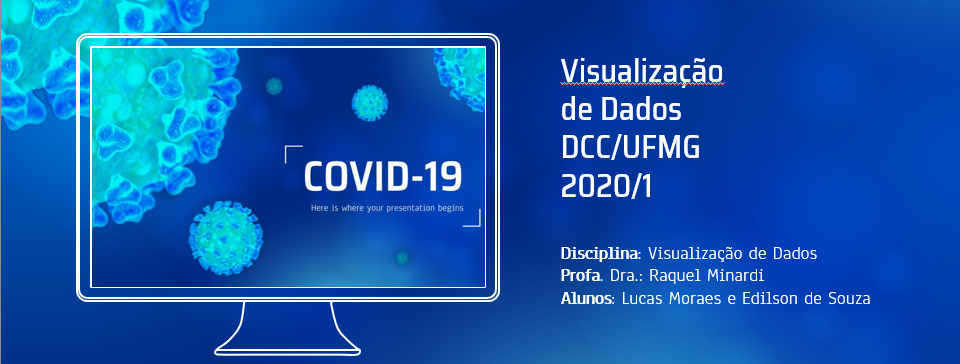



---


<h1>Visualização de Dados
- DCC/UFMG 2020/1 - Projeto Final  </h1>


---




---


<b>Disciplina</b>: Visualização de Dados                                
<b>Profa. Dra.</b>: Raquel Minardi             
<b>Alunos</b>: Lucas Moraes e Edilson de Souza

Contatos:

<li> moraes.lsantos@gmail.com </li>
<li> edilson.souza@gmail.com </li>

---



Assista o vídeo de apresentação disponivel em:
 <a href="https://www.youtube.com/">Video Final</a> 



---


<q><h3> <i><b> “Não podemos dizer isso em voz alta ou clara 
o suficiente ou com frequência suficiente: 
Todos os países ainda podem mudar o curso desta pandemia.”</q> <h3> </i> </b>
<p></p>
<p></p>

—DR. TEDROS ADHANOM GHEBREYESUS,  DIRETOR-GERAL DA ORGANIZAÇÃO MUNDIAL DA SAÚDE


---





---



## <strong>1. Proposta de Projeto</strong>

Estudos relacionados a pandemia COVID-19 tem no atual momento extrema relevância nos aspectos sociais, econômicos e de saúde pública que a situação impõe a sociedade mundial.  

Cientistas no mundo todo buscam compreender a cada dia o mecanismo de propagação do vírus na intenção de encontrar medicamentos, ou ainda uma vacina, eficiente. Dentre algumas candidatas a vacina (em estágio avançado de testes clínicos), podemos citar as desenvolvidas pela Moderna/NIAID (EUA), Sinovac (China) e Oxford/AstraZeneca (Reino Unido) estas últimas estando na terceira fase, ambas sendo testadas no Brasil.

Apesar da alta visibilidade e contingente de profissionais especializados tratando o tema, não é possível encontrar plataformas de visualização de dados que forneçam uma análise sistêmica, além de se observar um viés claro para reporte dos números absolutos de novos casos e mortes.

Dentre os mais renomados sites de divulgação de informações relativas à COVID-19 destaca-se o da Universidade John Hopkins (EUA) e o site mantido pela Universidade de Oxford (RU), Our World in Data. Em ambos podemos encontrar visualizações com grande foco nos números absolutos e com poucas correlações entre as informações publicadas, como exemplificado na figura abaixo.



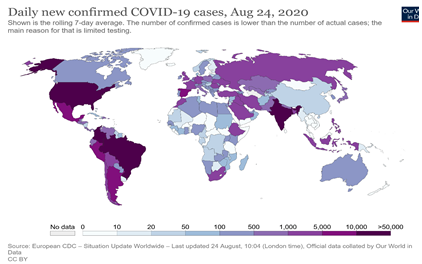

Nessa linha, o presente trabalho busca integrar visualmente e correlacionar as informações disponíveis na base de dados do Our World in Data, uma vez que a mesma apresenta uma abrangência de informações maior que as demais analisadas, sendo utilizadas como fonte de informações tanto para pesquisa quanto para ensino em renomadas universidades como Stanford, Harvard e MIT, além da própria Universidade de Oxford, provedora dos dados deste projeto.


Com o trabalho, pretendemos apresentar uma ferramenta para visualização dos dados relacionados a pandemia de COVID-19 que possibilite a análise de outras informações em relação ao comportamento da doença no mundo, que outras plataformas disponíveis atualmente não abarcam. 




Análises, como as elencadas abaixo, não são facilmente possibilitadas por grande parte das visualizações disponíveis na web, sendo estes os desafios que o presente trabalho pretende responder:


1. Como o número de novos casos evolui, com base no rigor das políticas de isolamento implementadas por cada país?
2. Como a velocidade de aplicação de testes tem influenciado na contenção da doença?
3. A população socialmente vulnerável está sendo mais afetada?
4. Existem outros agrupamentos ainda não explorados suficientemente? (etnia, sexo, etc...)
5. É possível elaborar visualizações de fácil entendimento que reflitam melhor a situação de cada país?
6. É possível explicar causas de aceleração ou desaceleração de propagação do vírus com os dados coletados?



---


## 2. Base de Dados

A base de dados a ser utilizada é a Our World in Data COVID-19 dataset  e consta de dados atualizados diariamente sobre a pandemia dentre eles:

	Número de novos casos;	
  Número de casos por milhão;
	Número de mortes;
	Número de mortes por milhão;
	Número total de testes;
	Indice Stringency (Oxford);
	Idade média;
	Percentual da população acima de 65 anos;
	PIB per capita;
	População com diabetes;
	População com doenças cardiovasculares,

  <li><a href="https://github.com/owid/covid-19-data/tree/master/public/data"> Dataset Our World in Data </a> </li>

Segue abaixo uma amostra dos dados utilizados:

In [ ]:
#inserir código com amostra do dataset



---


## 3. Método e Ferramentas

<b> Mètodo </b> <br><br>
Para desenvolver o projeto utilizamos o método que consiste basicamente no refinamento das questões propostas neste documento, coleta dos dados da fonte supra-citada, bem como demais fontes alternativas que se fizerem necessárias, limpeza e análise ad-hoc dos dados com relação a completude e contexto. Análise exploratória de dados com estatísticas mais aprofundadas e identificação de padrões eventualmente detectados, elaboração das visualizações de dados. Elaboração de visualizações no ambiente sand-box (PowerBI) para seleção das melhores visualizações que responderem as perguntas refinadas.

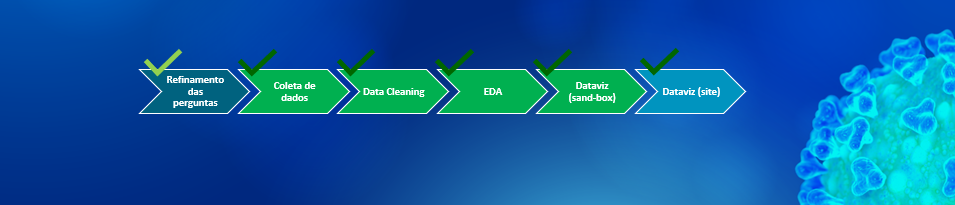

<b> Ferramentas </b> <br><br>
Para executar o método proposto elegemos as seguintes ferramentas para o projeto:

*  Github: Código fonte
*  Python: Linguagem de programação utilizada
*  Matplotlib: Bibliotecas para visualização de dados
*  Microsoft PowerBI: Para elaboração das visualizações sand-box
*  Microsoft Teams: Documentação, reuniões e colaboração
*  OBS Studio: Criação do vídeo de apresentação
*  Youtube: Publicação dos vídeos do projeto




---


## 4. Resultados

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">a few lines of code</a>. Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including <a href="#using-accelerated-hardware">GPUs and TPUs</a>, regardless of the power of your machine. All you need is a browser.

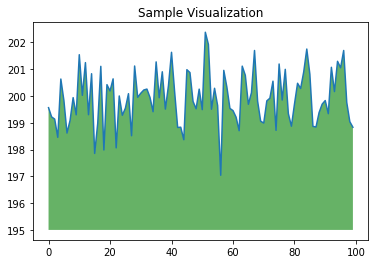

In [2]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Sample Visualization")
plt.show()

In [1]:
import os
import csv

import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates

# List files in the directory
BASE_PATH = "C:/Users/Lucas/Dropbox/Ciência da Computação (M) - UFMG/2020_1/TECC - Visualização de Dados/Projeto/"

file = os.listdir(BASE_PATH+"dataset/")

df = pd.read_csv(BASE_PATH+"dataset/"+file[0], sep=";", usecols=['location','date','total_cases','total_deaths','total_tests'])
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df['total_cases'] = pd.to_numeric(df['total_cases'], downcast="float")

countries = ['Argentina','Brazil','India','United States','Spain']

# Time Series

plt.style.use('seaborn')

for country in countries:

	df_rem = df.loc[(df['location']==country)]
	date = df_rem['date']
	total_cases = df_rem['total_cases']
	plt.plot(date, total_cases, linestyle='solid', label=country)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Number of COVID-19 Cases in Some Countries of the World')
plt.xlabel('Date')
plt.ylabel('Total Number of Cases')
plt.legend(framealpha=1, frameon=True);
plt.show()

# Correlation

df = pd.read_csv(BASE_PATH+"dataset/"+file[0], sep=";", usecols=['location','total_cases','new_cases','total_deaths','total_cases_per_million','new_cases_per_million','total_deaths_per_million','total_deaths_per_million','total_tests','population_density','population_density','aged_70_older','cardiovasc_death_rate','female_smokers','male_smokers','diabetes_prevalence'])
df_rem = df.loc[(df['location']=='Brazil')]
columns = ['total_cases','new_cases','total_deaths','total_cases_per_million','new_cases_per_million','total_deaths_per_million','total_deaths_per_million','total_tests','population_density','population_density','aged_70_older','cardiovasc_death_rate','female_smokers','male_smokers','diabetes_prevalence']
corr = df_rem.corr()
sn.heatmap(corr, annot=True)
plt.xticks(rotation=45)
plt.yticks(fontsize=6)
plt.xticks(fontsize=6)
plt.show()

FileNotFoundError: ignored



---


## 5. Conclusão

Neste trabalho buscou-se abordar visualizações de dados complementares aos já disponiveis no domínio público trazendo um olhar para questões que ainda carecem de maior visibilidade por parte da população. Análise complementares podem ser exploradas com a mesma base para responder outras questões de interesse amplo e a medida que novas informações forem disponibilizadas por demais fontes de dados públicas. 

Agradecemos a oportunidade dada pela prof. Dra. Raquel Minardi por explorar um tema de relevância global em sua disciplina cujo valor no contexto de Transformação Digital se encontra cada vez mais necessária para compreendermos o mundo com dados.



---

## 6. Referências

Abaixo segue algumas referencias utilizadas neste trabalho:

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">Retraining an Image Classifier</a>: Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">Text Classification</a>: Classify IMDB film reviews as either <em>positive</em> or <em>negative</em>.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">Style Transfer</a>: Use deep learning to transfer style between images.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: Use a machine-learning model to answer questions from the SQuAD dataset.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">Video Interpolation</a>: Predict what happened in a video between the first and the last frame.
